# Captial Bike Sharing Analysis

Bike sharing is a fundamental service, commonly used in the urban mobility sector. It is easily accessible (as no driving license is required to ride a bike), is cheaper than normal car sharing services (since bike maintenance and insurance are substantially cheaper than automobile ones), and, finally, is often a fast way to commute within the city. Therefore, understanding the driving factors of bike sharing requests is essential for both companies and users.

From a company's perspective, identifying the expected bike demand in a specific area, within a specific time frame, can significantly increase revenue and customer satisfaction. Moreover, bike relocation can be optimized to further reduce operational costs. From a user's perspective, probably the most important factor is bike availability in the shortest wait time, which we can easily see aligning with the company's interests.

For this project, I will be analyzing bike sharing data from Capital Bikeshare in Washington, D.C., USA, for the period between January 1, 2011, and December 31, 2012. The data is aggregated on an hourly basis. No initial and final locations of the individual rides are available, but only the total number of rides per hour. Nevertheless, additional meteorological information is available in the data, which could serve as a driving factor for identifying the total number of requests for a specific time frame (bad weather conditions could have a substantial impact on bike sharing demand).

# Understanding the Data

Loading the data and initial exploration.

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [3]:
# load hourly data
hr_df = pd.read_csv('hour.csv')
day_df = pd.read_csv('day.csv')

In [4]:
print(f"Data dimension: {hr_df.shape}")
for col in hr_df.columns:
    print(f"Column: {col:35} | type: {str(hr_df[col].dtype):7} \
| missing values: {hr_df[col].isna().sum():3d}")

Data dimension: (17379, 17)
Column: instant                             | type: int64   | missing values:   0
Column: dteday                              | type: object  | missing values:   0
Column: season                              | type: int64   | missing values:   0
Column: yr                                  | type: int64   | missing values:   0
Column: mnth                                | type: int64   | missing values:   0
Column: hr                                  | type: int64   | missing values:   0
Column: holiday                             | type: int64   | missing values:   0
Column: weekday                             | type: int64   | missing values:   0
Column: workingday                          | type: int64   | missing values:   0
Column: weathersit                          | type: int64   | missing values:   0
Column: temp                                | type: float64 | missing values:   0
Column: atemp                               | type: float64 | missing 

In [5]:
print(f"Data dimension: {day_df.shape}")
for col in day_df.columns:
    print(f"Column: {col:35} | type: {str(day_df[col].dtype):7} \
| missing values: {day_df[col].isna().sum():3d}")

Data dimension: (731, 16)
Column: instant                             | type: int64   | missing values:   0
Column: dteday                              | type: object  | missing values:   0
Column: season                              | type: int64   | missing values:   0
Column: yr                                  | type: int64   | missing values:   0
Column: mnth                                | type: int64   | missing values:   0
Column: holiday                             | type: int64   | missing values:   0
Column: weekday                             | type: int64   | missing values:   0
Column: workingday                          | type: int64   | missing values:   0
Column: weathersit                          | type: int64   | missing values:   0
Column: temp                                | type: float64 | missing values:   0
Column: atemp                               | type: float64 | missing values:   0
Column: hum                                 | type: float64 | missing va

In [6]:
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
# print some generic statistics about the data
print(f"Shape of data: {hr_df.shape}")
print(f"Number of missing values in the data:\
{hr_df.isnull().sum().sum()}")

Shape of data: (17379, 17)
Number of missing values in the data:0


In [9]:
hr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [10]:
day_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


### Feature Description

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- **instant**: record index
- **dteday**: date
- **season**: season (1:winter, 2:spring, 3:summer, 4:fall)
- **yr**: year (0: 2011, 1:2012)
- **mnth**: month ( 1 to 12)
- **hr**: hour (0 to 23)
- **holiday**: weather day is holiday or not (extracted from Web Link)
- **weekday**: day of the week
- **workingday**: if day is neither weekend nor holiday is 1, otherwise is 0.
+ **weathersit**:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- **atemp**: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- **hum**: Normalized humidity. The values are divided to 100 (max)
- **windspeed**: Normalized wind speed. The values are divided to 67 (max)
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered

# Preprocessing Temporal and Weather Features

I encoded the temporal features into a more human-readable format. The seasons column contains values from 1 to 4, which encode, respectively, the Winter, Spring, Summer, and Fall seasons. The yr column contains the values 0 and 1 representing 2011 and 2012, while the weekday column contains values from 0 to 6, with each one representing a day of the week (0: Sunday, 1: Monday, through to 6: Saturday). We scale the hum column to values between 0 and 100 (as it represents the humidity percentage), and the windspeed column to values between 0 and 67 (as those are the registered minimum and maximum wind speed):

In [11]:
# create a copy of the original data

df = hr_df.copy()

In [12]:
seasons_mapping = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
df['season'] = df['season'].apply(lambda x: seasons_mapping[x])

map the season variable from a numerical to a encoded categorical one. 

In [13]:
# create new column by encoding the weathersit one
weather_mapping = {1: 'clear', 2: 'cloudy', 3: 'light_rain_snow', 4: 'heavy_rain_snow'}
df['weather'] = df['weathersit'].apply(lambda x: weather_mapping[x])

In [14]:
# transform yr
yr_mapping = {0: 2011, 1: 2012}
df['yr'] = df['yr'].apply(lambda x: yr_mapping[x])

In [15]:
# transform weekday
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

df['weekday'] = df['weekday'].apply(lambda x: weekday_mapping[x])

According to the information provided by the data, the weathersit column represents the current weather conditions, where 1 stands for clear weather with a few clouds, 2 represents cloudy weather, 3 relates to light snow or rain, and 4 stands for heavy snow or rain. The hum column stands for the current normalized air humidity, with values from 0 to 1 (hence, we will multiply the values of this column by 100, in order to obtain percentages). Finally, the windspeed column represents the windspeed, which is again normalized to values between 0 and 67 m/s.

Encode the weathersit values:

In [16]:
# transform weathersit
weather_mapping = {1: 'clear', 2: 'cloudy', 3: 'light_rain_snow', 4: 'heavy_rain_snow'}

df['weathersit'] = df['weathersit'].apply(lambda x: weather_mapping[x])

Finally, rescale the hum and windspeed columns:

In [17]:
# transform hum and windspeed
df['hum'] = df['hum']*100
df['windspeed'] = df['windspeed']*67

We can visualize the results from our transformation by calling the sample() method on the newly created dataset:

In [18]:
# visualize preprocessed columns
cols = ['season', 'yr', 'weekday', 'weathersit', 'hum', 'windspeed']

df[cols].sample(10, random_state=123)

,season,yr,weekday,weathersit,hum,windspeed
5792,summer,2011,Saturday,clear,74.0,8.9981
7823,fall,2011,Sunday,clear,43.0,31.0009
15426,fall,2012,Tuesday,cloudy,77.0,6.0032
15028,fall,2012,Sunday,clear,51.0,22.0028
12290,spring,2012,Friday,cloudy,89.0,12.9980
3262,spring,2011,Friday,clear,64.0,7.0015
10763,spring,2012,Thursday,clear,42.0,23.9994
12384,spring,2012,Tuesday,light_rain_snow,82.0,11.0014
6051,summer,2011,Wednesday,clear,52.0,19.0012
948,winter,2011,Saturday,clear,80.0,0.0000


As you can see from the output, the transformed features have categorial values instead of numerical ones. 

# Registered versus Casual Use Analysis

We begin our analysis of the single features by focusing on the two main ones: the number of rides performed by registered users versus the number of rides performed by non-registered (or casual) ones. 

In [19]:
"""
assert that total number of rides is equal to the sum of registered and casual ones
"""

assert (df.casual + df.registered == df.cnt).all(), 'Sum of casual and registered rides not equal to total number of rides'

The first step in analyzing the two columns is to look at their distributions.

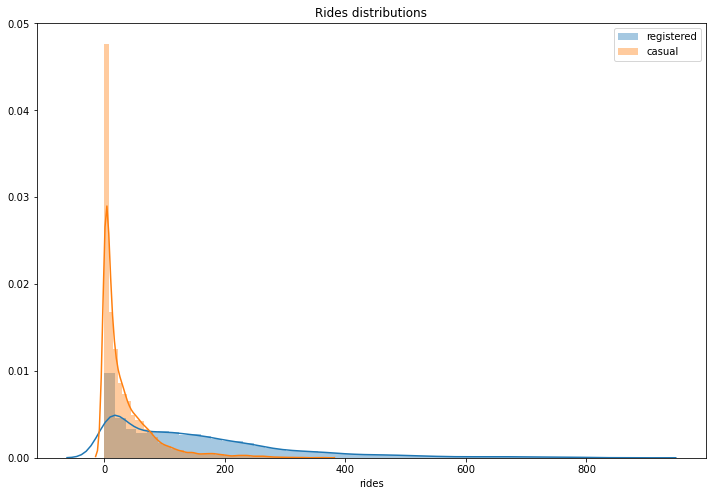

In [20]:
# plot distributions of registered vs casual rides
plt.figure(figsize=(12,8))
sns.distplot(df['registered'], label='registered')
sns.distplot(df['casual'], label='casual')
plt.legend()
plt.xlabel('rides')
plt.title("Rides distributions")

<span style='background:yellow'> We can easily see that registered users have way more rides than casual ones.</span> Furthermore, we can see that the two distributions are skewed to the right, meaning that, for most of the entries in the data, zero or a small number of rides were registered (think, for example, of overnight rides). Finally, every entry in the data has quite a large number of rides (that is, higher than 800).

Afterward, we compute the total number of rides for each day by first grouping the data by the dteday column, and then summing the single entries for the casual and registered columns.

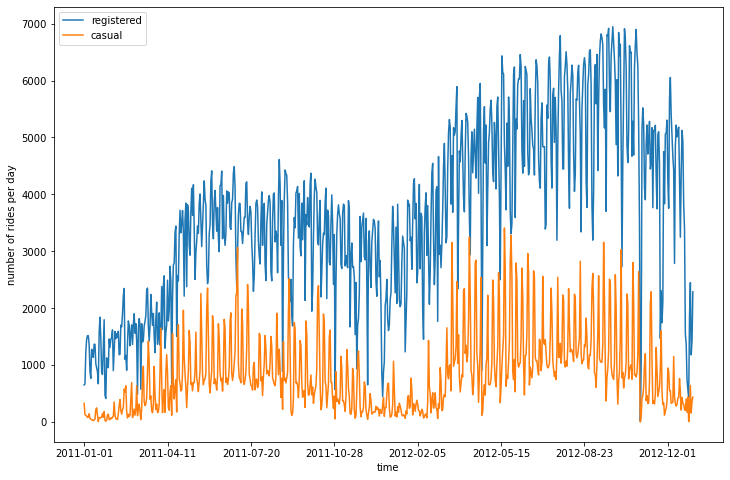

In [21]:
# plot evolution of rides over time

plot_data = df[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(12,8))
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");
plt.savefig('desktop', format='png')

As you can see from the figure, <span style='background:yellow'> the number of registered rides is always above and significantly higher than the number of casual rides per day. Furthermore, we can observe that during winter, the overall number of rides decreases (which is totally in line with expectations, as bad weather and low temperatures have a negative impact on ride sharing services).</span> Note that there is quite a lot of variance in the time series of the rides in the figure. One way to smooth out the curves is to take the rolling mean and standard deviation of the two time series and plot those instead. In this way, we can visualize not only the average number of rides for a specific time period (also known as a window) but also the expected deviation from the mean:

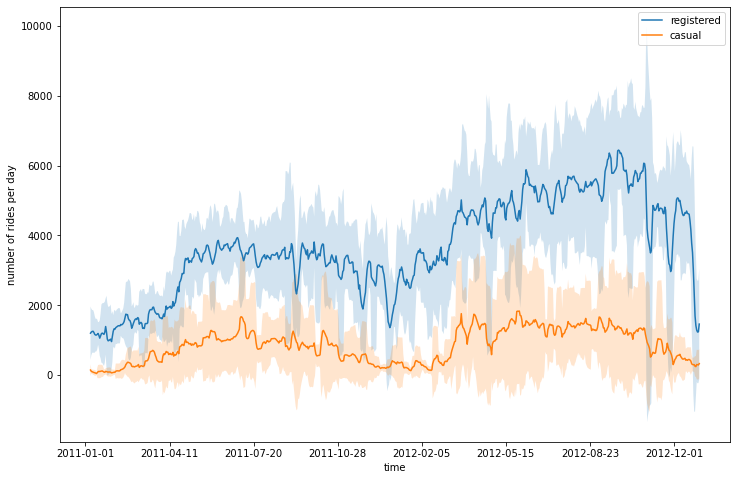

In [22]:
# Create new dataframe with necessary for plotting columns, and obtain number of rides per day, by grouping over each day

plot_data = df[['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()

# define window for computing the rolling mean and standard deviation

window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()

# Create a plot of the series, where we first plot the series of rolling means, then we color the zone between the series of rolling means +- 2 rolling standard deviations

ax = rolling_means.plot(figsize=(12,8))
ax.fill_between(rolling_means.index, rolling_means['registered'] \
                + 2*rolling_deviations['registered'], \
                rolling_means['registered'] \
                - 2*rolling_deviations['registered'], \
                alpha = 0.2)

ax.fill_between(rolling_means.index, rolling_means['casual'] \
                + 2*rolling_deviations['casual'], \
                rolling_means['casual'] \
                - 2*rolling_deviations['casual'], \
                alpha = 0.2)

ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");

This is a handy way to compute rolling statistics on a time series. <span style='background:yellow'> In other words, the value of the rolling mean (or the standard deviation) at a certain time instance is only computed from the last window entries in the time series (in our case, this is 7), and not from the entries of the whole series.</span>

Let's now focus on the distributions of the requests over separate hours and days of the week.  

C:\Users\crios\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


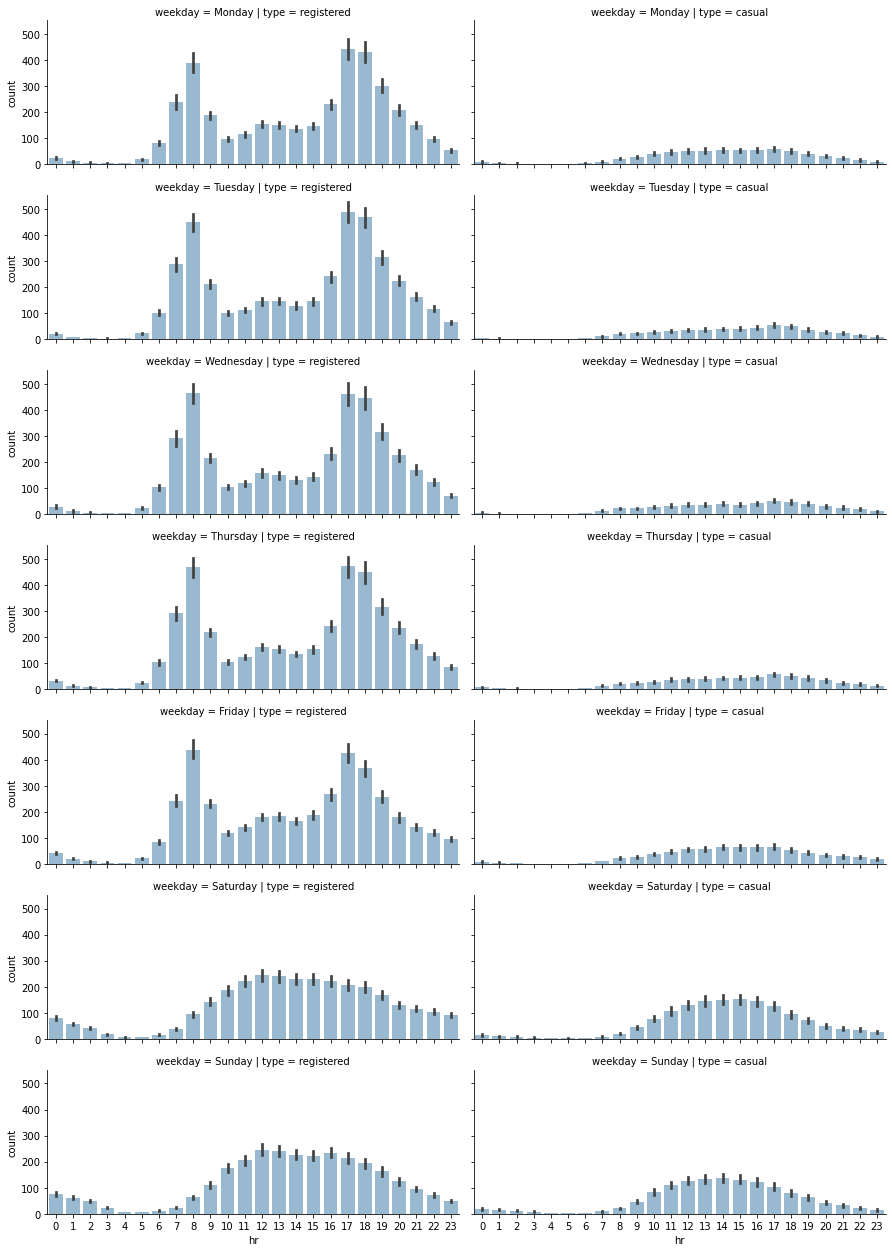

In [23]:
# select relevant columns

plot_data = df[['hr', 'weekday', 'registered', 'casual']]

"""
transform the data into a format, in number of entries are computed as count,
for each distinct hr, weekday and type (registered or casual)
"""

plot_data = plot_data.melt(id_vars=['hr', 'weekday'], var_name='type', value_name='count')

"""
create FacetGrid object, in which a grid plot is produced.
As columns, we have the various days of the week, as rows, the different types (registered and casual)
"""

grid = sns.FacetGrid(plot_data, row='weekday', col='type', height=2.5, aspect=2.5, row_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# populate the FacetGrid with the specific plots

grid.map(sns.barplot, 'hr', 'count', alpha=0.5)

We can immediately note that on working days, <span style='background:yellow'> the highest number of rides for registered users takes place around 8 AM and at 6 PM. </span>  This is totally in line with our expectations, as it is likely that most registered users use the bike sharing service for commuting.<span style='background:yellow'> On the other hand, the casual usage of bike sharing services on working days is quite limited, as the plot shows.</span>

During the weekend, we can see that ride distributions change for both casual and registered users. Still, registered rides are more frequent than casual ones, <span style='background:yellow'> but both the distributions have the same shape, almost uniformly distributed between the time interval of 11 AM to 6 PM.</span>

<span style='background:yellow'> As a conclusion, we could claim that most of the usage of bike sharing services occurs during working days, right before and right after the standard working time (that is, 9 to 5) </span>

# Analyzing Seasonal Impact on Rides

### The distribution of rides on a hour basis

C:\Users\crios\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


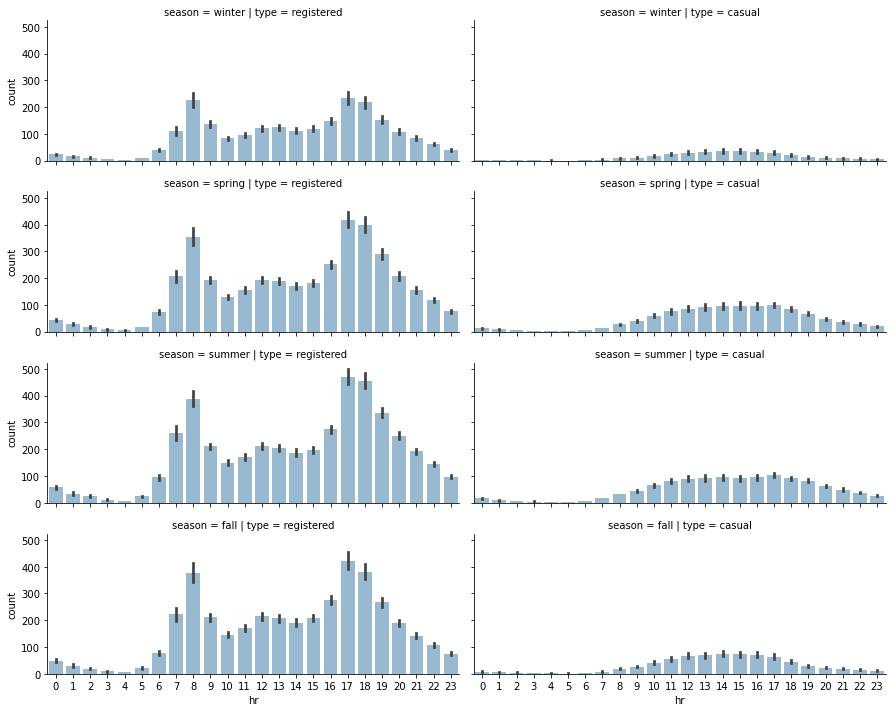

In [24]:
# select subset of the data
plot_data = df[['hr', 'season', 'registered', 'casual']]

# unpivot data from wide to long format
plot_data = plot_data.melt(id_vars=['hr', 'season'], var_name='type', \
                           value_name='count')

# define FacetGrid
grid = sns.FacetGrid(plot_data, row='season', \
                     col='type', height=2.5, aspect=2.5, \
                     row_order=['winter', 'spring', 'summer', 'fall'])

# apply plotting function to each element in the grid
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)

# save figure
#grid.savefig('figs/exercise_1_02_a.png', format='png')

As can be seen in the plot, <span style='background:yellow'> while each season has a similar graph shape, the count is lower for the winter graph. So there are fewer rides (registered and casual) during winter.</span> This makes sense, as fewer rides are likely to occur when the weather conditions are poor.

### The distribution of rides on a weekday basis

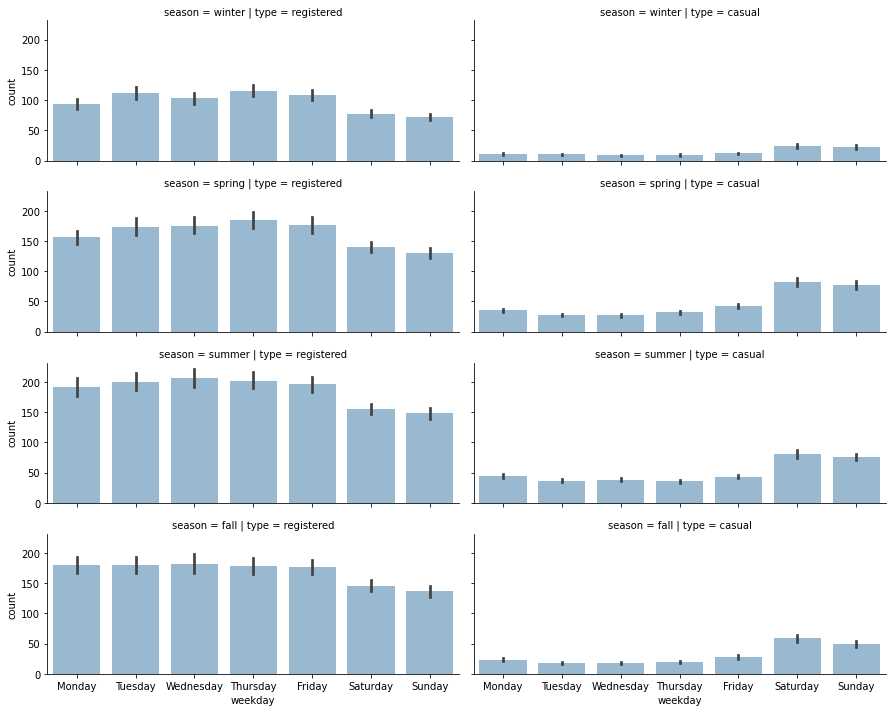

In [25]:
plot_data = df[['weekday', 'season', 'registered', 'casual']]
plot_data = plot_data.melt(id_vars=['weekday', 'season'], var_name='type', value_name='count')

grid = sns.FacetGrid(plot_data, row='season', col='type', height=2.5, aspect=2.5, 
                     row_order=['winter', 'spring', 'summer', 'fall'])
grid.map(sns.barplot, 'weekday', 'count', alpha=0.5, 
         order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# save figure
#grid.savefig('figs/exercise_1_02_b.png', format='png')

<span style='background:yellow'> There is a decreasing number of registered rides over the weekend (compared to the rest of the week), while the number of casual rides increases.</span> This could enforce our initial hypothesis, that is, <span style='background:yellow'> that registered customers mostly use the bike sharing service for commuting (which could be the reason for the decreasing number of registered rides over the weekend), while casual customers use the service occasionally over the weekend.</span> Of course, such a conclusion cannot be based solely on plot observations but has to be backed by statistical tests, which is the topic of our next section.

### Estimating Average Registered Rides

Start with computing the average number of registered rides per hour.<span style='background:yellow'>  Note that this value will serve in formulating the null hypothesis because, here, you are explicitly computing the population statistic that is, the average number of rides.</span> In most of the cases, such quantities are not directly observable and, in general, you only have an estimation for the population statistics: 

In [26]:
# compute population mean of registered rides

pop_mean = df.registered.mean()

The importance of having an unbiased sample of the data

In [28]:
# perform t-test and compute p-value
from scipy.stats import ttest_1samp
# get sample as 5% of the full data
import random
random.seed(111)
sample_unbiased = df.registered.sample(frac=0.05)
test_result_unbiased = ttest_1samp(sample_unbiased, pop_mean)

print(f"Unbiased test statistic: {test_result_unbiased[0]}, p-value: {test_result_unbiased[1]}")

Test statistic: -3.491969148378619, p-value: 0.0004887645279519517


### Hypothesis Testing on Registered Rides

First, formulate the null hypothesis. As mentioned earlier, we are interested in identifying whether there is a statistically significant difference between registered rides during working days and the weekend. <span style='background:yellow'>Therefore, our null hypothesis is that the average number of rides for registered users during working days is the same as the average number of rides during the weekend.</span> 

Collect data for the two groups.

In [30]:
# define mask, indicating if the day is weekend or work day
weekend_days = ['Saturday', 'Sunday']
weekend_mask = df.weekday.isin(weekend_days)
workingdays_mask = ~df.weekday.isin(weekend_days)

# select registered rides for the weekend and working days
weekend_data = df.registered[weekend_mask]
workingdays_data = df.registered[workingdays_mask]

Perform the two-sample t-tests by using the scipy.stats.ttest_ind function:

In [31]:
# perform ttest
from scipy.stats import ttest_ind
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, p-value: {test_res[1]:.03f}")

Statistic value: -16.004, p-value: 0.000


The resulting p-value from this test is less than 0.0001, which is far below the standard critical 0.05 value.<span style='background:yellow'> In conclusion, we can reject the null hypothesis and confirm that our initial observation is correct: that is, there is a statistically significant difference between the number of rides performed during working days and the weekend.</span>

Plot the distributions of the two samples:

Text(0.5, 1.0, 'Registered rides distributions')

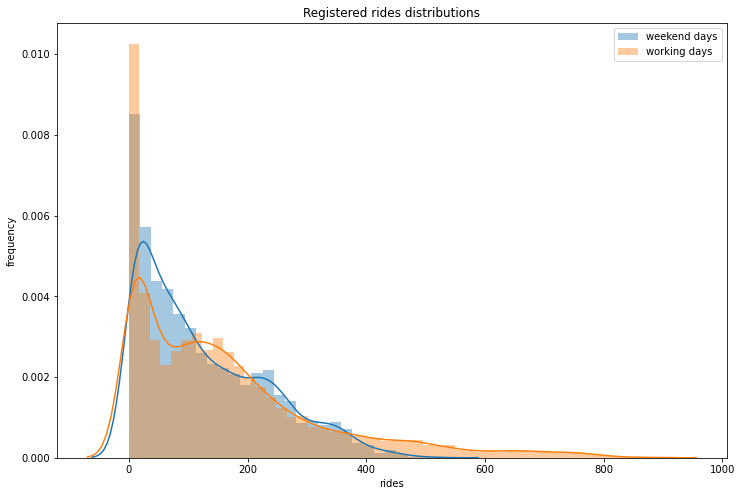

In [33]:
# plot distributions of registered rides for working vs weekend days

plt.figure(figsize=(12,8))
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Registered rides distributions")

We will perform the same type of hypothesis testing to validate the second assumption that casual users perform more rides during the weekend. <span style='background:yellow'> In this case, the null hypothesis is that the average number of rides during working days is the same as the average number of rides during the weekend, both performed only by casual customers. The alternative hypothesis will then result in a statistically significant difference in the average number of rides between the two groups:</span>

In [36]:
# select casual rides for the weekend and working days
weekend_data = df.casual[weekend_mask]
workingdays_data = df.casual[workingdays_mask]

# perform ttest
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, p-value: {test_res[1]:.03f}")

Statistic value: 41.077, p-value: 0.000


The p-value returned from the test is 0, which is strong evidence against the null hypothesis. Hence, we can conclude that <span style='background:yellow'> casual customers also behave differently over the weekend (in this case, they tend to use the bike sharing service more) as seen in the following figure:</span>

Text(0.5, 1.0, 'Casual rides distributions')

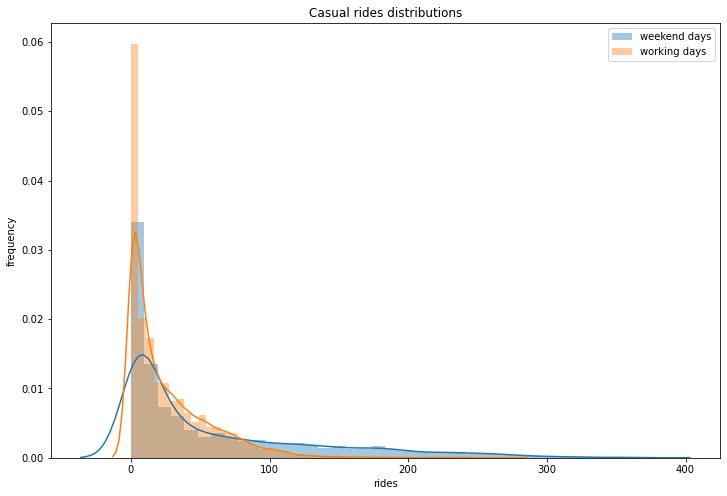

In [35]:
# plot distributions of casual rides for working vs weekend days
plt.figure(figsize=(12,8))
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Casual rides distributions")

In conclusion, <span style='background:yellow'> we can say that there is a statistically significant difference between the number of rides on working days and weekend days for both casual and registered customers.</span>

# Analysis of Weather-Related Features

Let's now focus on an analysis of the group of features representing the weather conditions. We expect to observe a strong dependency of those features on the current number of rides, as bad weather can significantly influence bike-sharing services.

**temp**: This is the normalized temperature in Celsius. Values are divided by 41, which means that the highest registered temperature in the data is 41°C (corresponding to 1 in our dataset).

**atemp**: The normalized feeling temperature in Celsius. Values are divided by 50, which means that the highest registered temperature in the data is 50°C (corresponding to 1 in our dataset).

**hum**: The humidity level as a percentage.

**windspeed**: The wind speed in m/s.

We can see that most weather-related features are continuous values (except for weathersit). Our variables of interest (the casual and registered number of rides) are continuously distributed; the most common way to measure the relationship between two different continuous variables is to measure their correlation.

Correlation (also known as Pearson's correlation) is a statistic that measures the degree to which two random variables move in relation to each other.

Let's define a function that performs the analysis between the variables.

In [37]:
# get correlation between col and registered rides
def plot_correlations(data, col):
    corr_r = np.corrcoef(data[col], data["registered"])[0,1]
    ax = sns.regplot(x=col, y="registered", data=data, scatter_kws={"alpha":0.05}, label=f"Registered rides (correlation: {corr_r:.3f})")
# get correlation between col and casual rides
    corr_c = np.corrcoef(data[col], data["casual"])[0,1]
    ax = sns.regplot(x=col, y='casual', data=data, scatter_kws={"alpha":0.05}, label=f"Casual rides (correlation: {corr_c:.3f})")
    #adjust legend alpha
    legend = ax.legend()
    for lh in legend.legendHandles:
        lh.set_alpha(0.5)
    ax.set_ylabel("rides")
    ax.set_title(f"Correlation between rides and {col}")
    return ax

Applying the previously defined function to the four columns (temp, atemp, hum, and windspeed) returns the following figure:

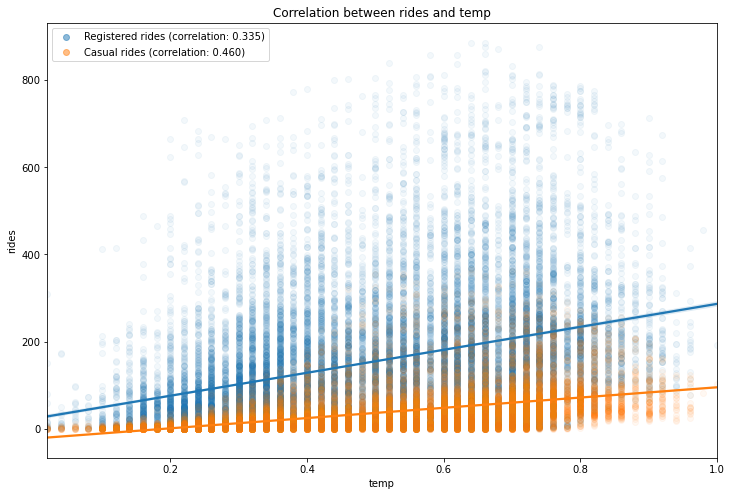

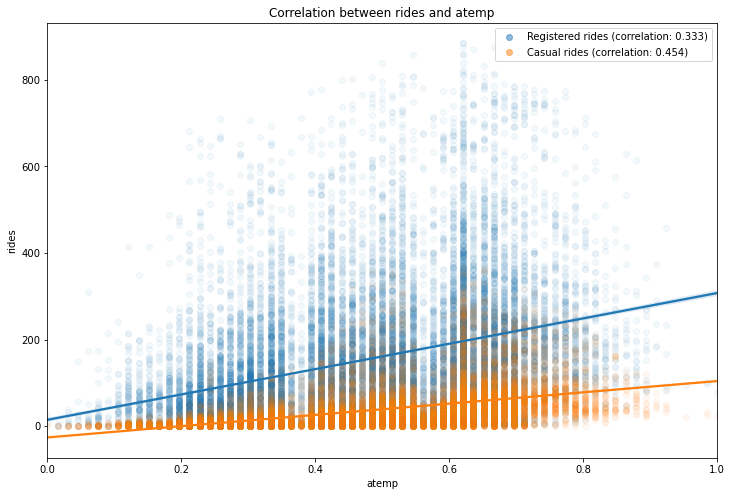

In [38]:
plt.figure(figsize=(12,8))
ax = plot_correlations(df, 'temp')

plt.figure(figsize=(12,8))
ax = plot_correlations(df, 'atemp')

Plot the correlation between the rides and hum, windspeed features separately:

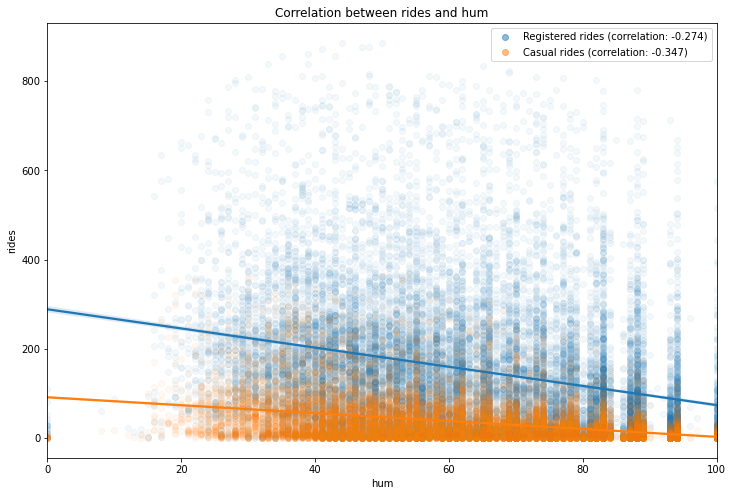

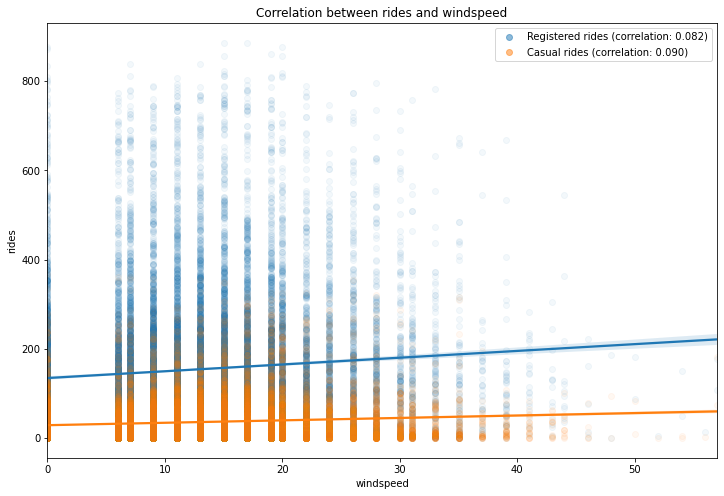

In [39]:
plt.figure(figsize=(12,8))
ax = plot_correlations(df, 'hum')


plt.figure(figsize=(12,8))
ax = plot_correlations(df, 'windspeed')

We can observe that <span style='background:yellow'> higher temperatures positively impact the number of rides (the correlation between registered/casual rides and temp is 0.335 and 0.46, respectively, and it's a similar case for atemp)</span>. Note that since the registered column values are widely spread concerning the different temp values, we have a lower correlation compared to the casual column. The same pattern can be observed in the number of rides and humidity.<span style='background:yellow'> The humidity level negatively correlates with both types of rides (-0.274 for registered and -0.347 for casual).</span> This means that with a high level of humidity (mist or rain), customers will tend not to use the bike-sharing service. The last visual shows a <span style='background:yellow'>minimal correlation between the number of rides and the wind speed (a weak positive correlation).</span>

### Evaluating the Difference between the Pearson and Spearman Correlations

We will investigate the difference between the Pearson correlation (in which a linear relationship between the two variables is assumed) and the Spearman correlation (in which only a monotonic relationship is required).

Define a function that, on the provided data and column, computes the Pearson and Spearman correlation coefficients with the registered and casual rides:

In [45]:
from scipy.stats import pearsonr, spearmanr
# define function for computing correlations
def compute_correlations(data, col):
    pearson_reg = pearsonr(data[col], data["registered"])[0]
    pearson_cas = pearsonr(data[col], data["casual"])[0]
    spearman_reg = spearmanr(data[col], data["registered"])[0]
    spearman_cas = spearmanr(data[col], data["casual"])[0]
    return pd.Series({"Pearson (registered)": pearson_reg, "Spearman (registered)": spearman_reg,"Pearson (casual)": pearson_cas,"Spearman (casual)": spearman_cas})

Note that both the pearsonr() and spearmanr() functions return a two-dimensional array in which the first value is the respective correlation. In contrast, the second one is the p-value of a hypothesis test in which the null hypothesis assumes that the computed correlation is equal to zero. This is quite handy at times, as you not only compute the correlation but also test its statistical significance against zero.

In [46]:
# compute correlation measures between different features
cols = ["temp", "atemp", "hum", "windspeed"]
corr_data = pd.DataFrame(index=["Pearson (registered)", "Spearman (registered)","Pearson (casual)", "Spearman (casual)"])

for col in cols:
    corr_data[col]=compute_correlations(df, col)
    
corr_data.T

,Pearson (registered),Spearman (registered),Pearson (casual),Spearman (casual)
temp,0.335361,0.373196,0.459616,0.570989
atemp,0.332559,0.373014,0.454080,0.570419
hum,-0.273933,-0.338480,-0.347028,-0.388213
windspeed,0.082321,0.122936,0.090287,0.122920


As we can observe, for most of the variables, the Pearson and Spearman correlation coefficients are close enough (some non-linearity is to be expected). <span style='background:yellow'> The most striking difference between the two coefficients occurs when comparing the temp (and atemp) and casual columns. More precisely, the Spearman correlation is quite high, meaning that there is significant evidence for a nonlinear, relatively strong, and positive relationship.</span>

An interpretation of this result is that <span style='background:yellow'> casual customers are far keener on using the bike-sharing service during higher temperatures.</span> We have already seen from our previous analysis that casual customers ride mostly during the weekend, and they do not rely on bike-sharing services for commuting to work. <span style='background:yellow'> This conclusion is again confirmed by the strong relationship with temperature instead of registered customers, whose rides have a weaker correlation with temperature.</span>

### Correlation Matrix Plot

(5.5, -0.5)

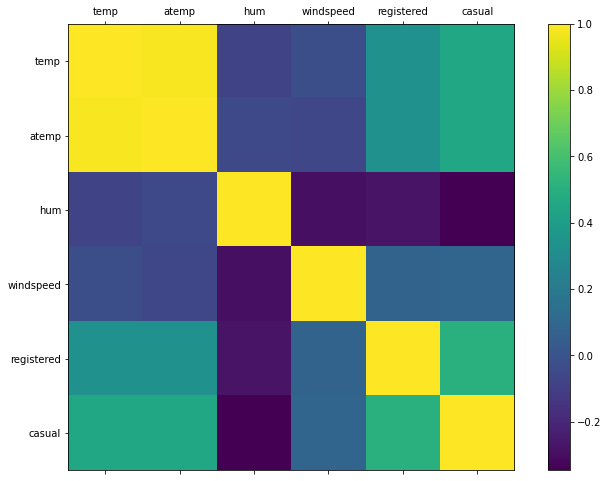

In [55]:
# plot correlation matrix

cols = ["temp", "atemp", "hum", "windspeed", "registered", "casual"]

plot_data = df[cols]
corr = plot_data.corr()
fig = plt.figure(figsize=(12,8))
plt.matshow(corr, fignum=fig.number)
plt.xticks(range(len(plot_data.columns)), plot_data.columns)
plt.yticks(range(len(plot_data.columns)), plot_data.columns)
plt.colorbar()
plt.ylim([5.5, -0.5])

### Time Series Analysis

We perform a time series analysis on the rides columns (registered and casual) in the bike sharing dataset.

In order to check stationarity, we can rely on two different techniques for identifying time series stationarity: rolling statistics and augmented Dickey-Fuller stationarity test (in most cases, we consider both of them).

Rolling statistics is a practical method in which we plot the rolling mean and standard deviation of a time series and visually identify whether those values fluctuate around a constant one, without large deviations. This is more a rule-of-thumb approach and not a rigorous statistical test for stationarity.

Augmented Dickey-Fuller stationarity test is a statistical test in which the null hypothesis is that the time series is nonstationary. Hence, when performing the test, a small p-value would be strong evidence against the time series being nonstationary.

Let's define a utility function, which will perform both tests for us:

In [56]:
# define function for plotting rolling statistics and ADF test for time series

from statsmodels.tsa.stattools import adfuller
def test_stationarity(ts, window=10, **kwargs):
# create dataframe for plotting
    plot_data = pd.DataFrame(ts)
    plot_data['rolling_mean'] = ts.rolling(window).mean()
    plot_data['rolling_std'] = ts.rolling(window).std()
    
    # compute p-value of Dickey-Fuller test
    p_val = adfuller(ts)[1]
    ax = plot_data.plot(**kwargs)
    ax.set_title(f"Dickey-Fuller p-value: {p_val:.3f}")

In [57]:
# get daily rides
daily_rides = df[["dteday", "registered", "casual"]]
daily_rides = daily_rides.groupby("dteday").sum()
# convert index to DateTime object
daily_rides.index = pd.to_datetime(daily_rides.index)

<Figure size 432x288 with 0 Axes>

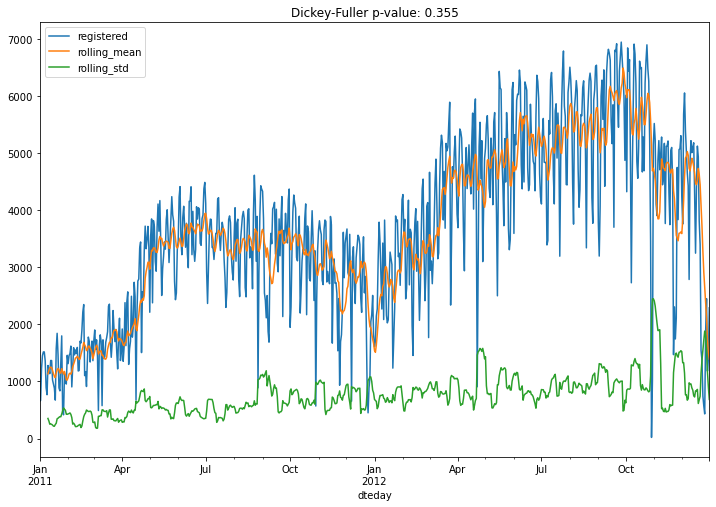

In [58]:
plt.figure()
test_stationarity(daily_rides["registered"], figsize=(12, 8))

<Figure size 432x288 with 0 Axes>

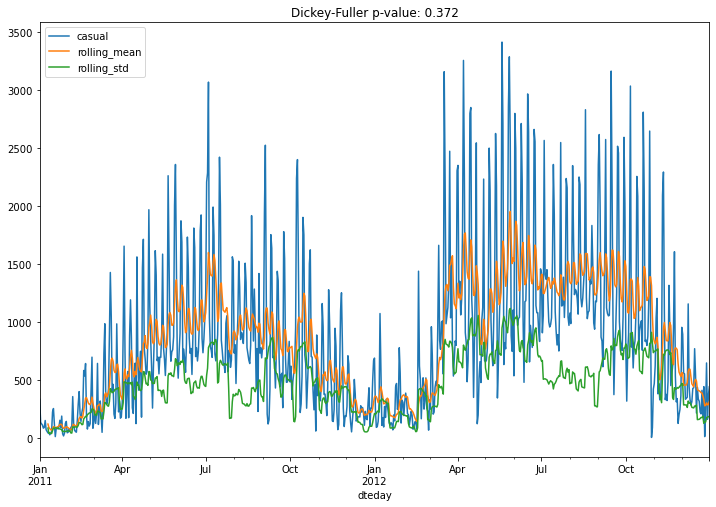

In [59]:
plt.figure()
test_stationarity(daily_rides["casual"], figsize=(12, 8))

In [60]:
# make time series stationary
registered = daily_rides["registered"]
registered_ma = registered.rolling(10).mean()
registered_ma_diff = registered - registered_ma
registered_ma_diff.dropna(inplace=True)

casual = daily_rides["casual"]
casual_ma = casual.rolling(10).mean()
casual_ma_diff = casual - casual_ma
casual_ma_diff.dropna(inplace=True)

<Figure size 432x288 with 0 Axes>

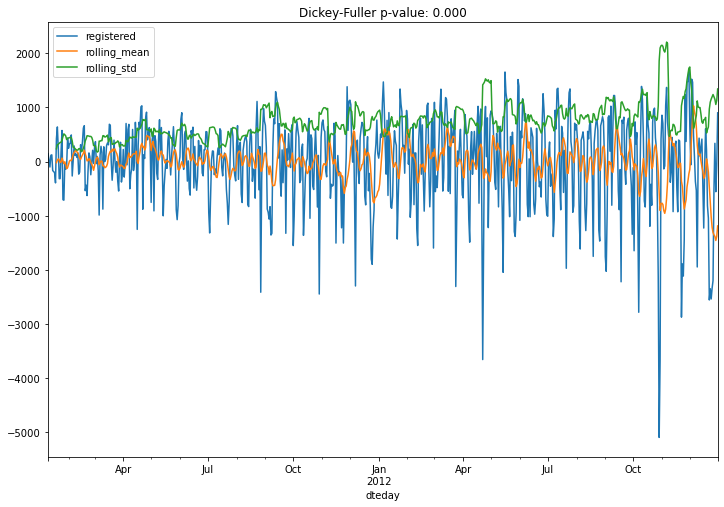

In [61]:
plt.figure()
test_stationarity(registered_ma_diff, figsize=(12, 8))

<Figure size 432x288 with 0 Axes>

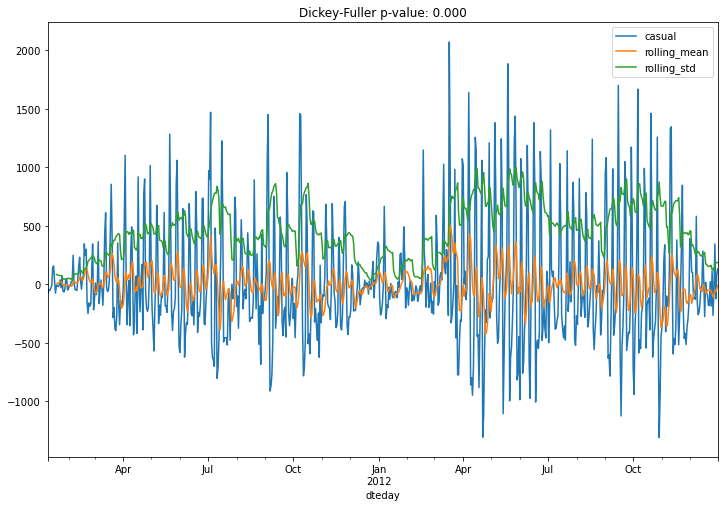

In [62]:
plt.figure()
test_stationarity(casual_ma_diff, figsize=(12, 8))

In [63]:
# subtract last value
registered = daily_rides["registered"]
registered_diff = registered - registered.shift()
registered_diff.dropna(inplace=True)

casual = daily_rides["casual"]
casual_diff = casual - casual.shift()
casual_diff.dropna(inplace=True)

<Figure size 432x288 with 0 Axes>

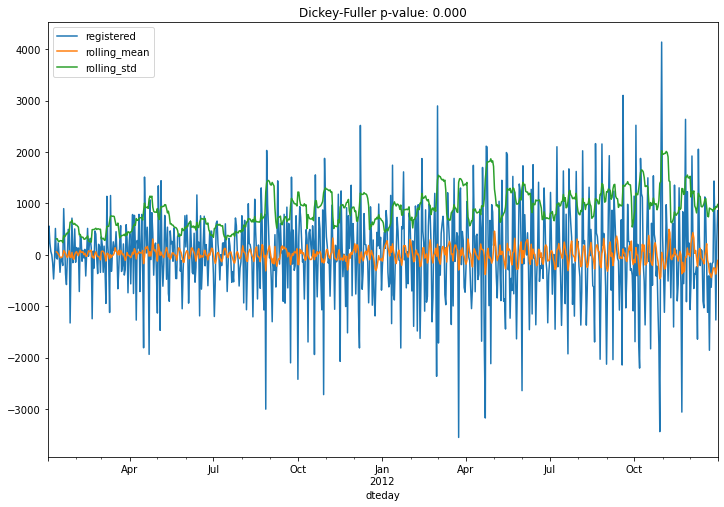

In [64]:
plt.figure()
test_stationarity(registered_diff, figsize=(12, 8))

<Figure size 432x288 with 0 Axes>

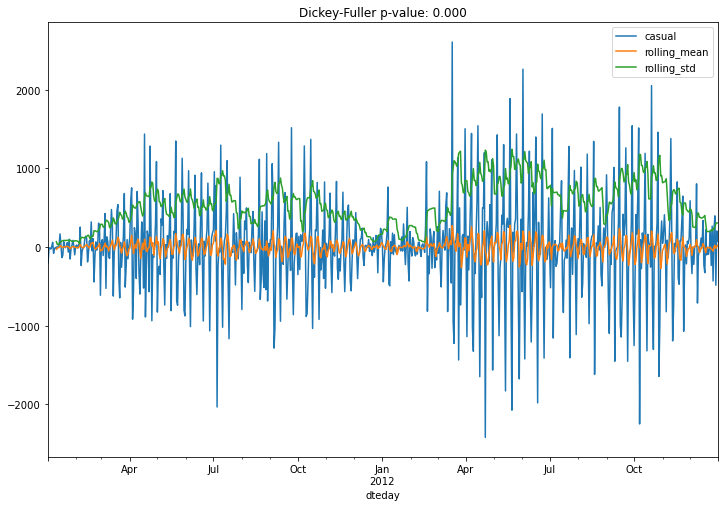

In [65]:
plt.figure()
test_stationarity(casual_diff, figsize=(12, 8))

As you can see, both of the techniques returned a time series, which is stationary, according to the Dickey-Fuller test. Note that an interesting pattern occurs in the casual series: a rolling standard deviation exhibits a clustering effect, that is, periods in which the standard deviation is higher and periods in which it is lower. This effect is quite common in certain fields (finance, for instance) and is known as volatility clustering. A possible interpretation, relative to our data, is that the number of casual rides increases during summer periods and drops during the winter.

As we saw from the last analysis, removing both the rolling mean and the last value returned a stationary time series. Let's also check also the previously mentioned technique, that is, time series decomposition. This involves breaking the original time series into separate components:

**Trend component**: This component represents a long-term progression of the series. A trend component is present when there is a persistent increase or decrease in the series.

**Seasonal component**: This component represents seasonality patterns in the data. A seasonal component persists when the data is influenced by certain seasonal factors (for example, monthly, quarterly, or yearly factors).

**Residual component**: This component represents an irregular or noisy component. This component describes random fluctuations in the data, which are not captured by the other components. In general, this is the residual of the time series, that is, once the other components have been removed.

### Exercise 1.06: Time series decomposition in trend, seasonality and residuals

In this exercise, you will exploit seasonal decomposition in the statsmodel Python library in order to decompose the number of rides into three separate components, trend, seasonal, and residual components:

Use the statsmodel.tsa.seasonal. seasonal_decompose() method to decompose the registered and casual rides:

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
registered_decomposition = seasonal_decompose(daily_rides["registered"])
casual_decomposition = seasonal_decompose(daily_rides["casual"])

To access each of these three signals, use .trend, .seasonal, and .resid variables. Furthermore, obtain visual results from the generated decompositions by calling the .plot() method:

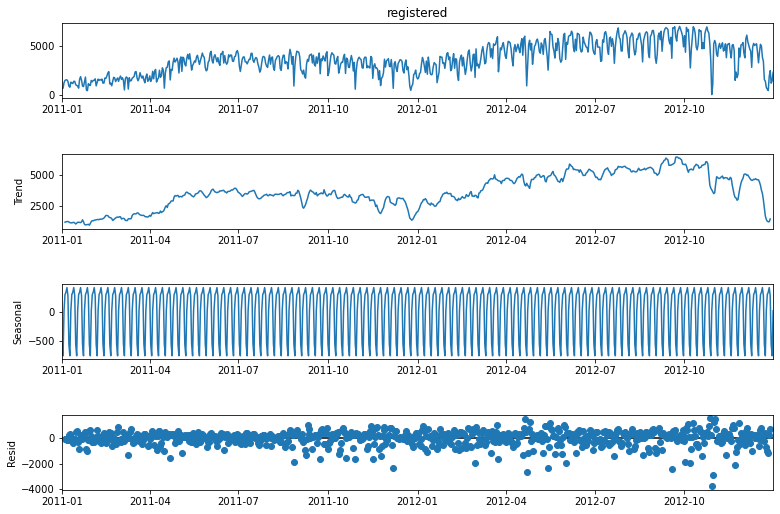

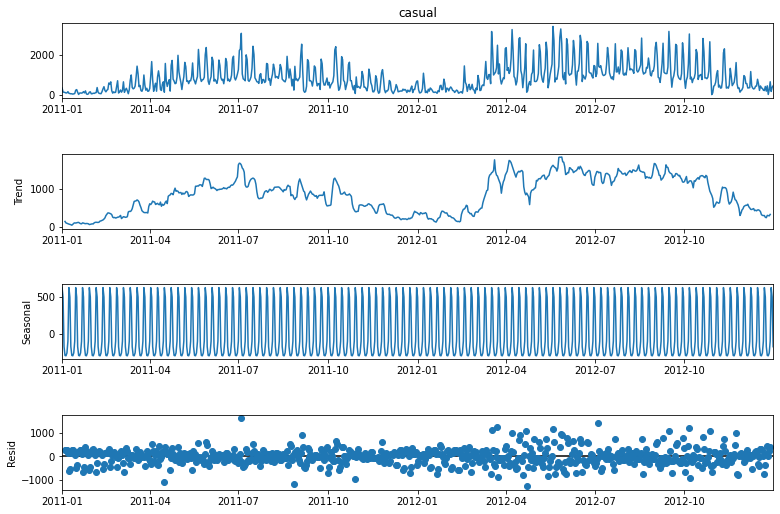

In [67]:
# plot decompositions

registered_plot = registered_decomposition.plot()
registered_plot.set_size_inches(12, 8)
casual_plot = casual_decomposition.plot()
casual_plot.set_size_inches(12, 8)

<Figure size 432x288 with 0 Axes>

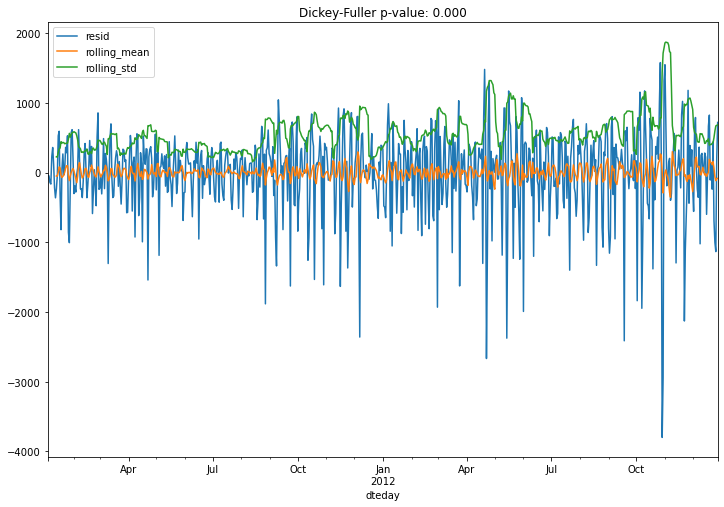

In [68]:
# test residuals for stationarity
plt.figure()
test_stationarity(registered_decomposition.resid.dropna(), figsize=(12, 8))

<Figure size 432x288 with 0 Axes>

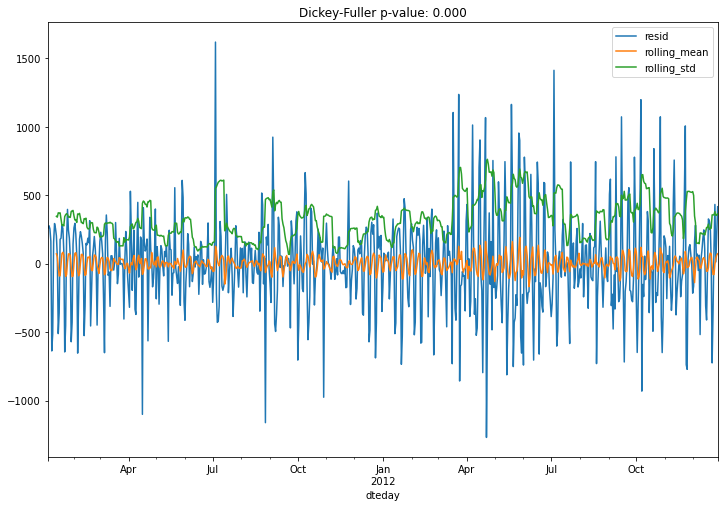

In [69]:
plt.figure()
test_stationarity(casual_decomposition.resid.dropna(), figsize=(12, 8))

As you can see, the residuals satisfy our stationary test.

A common approach to modeling a time series is to assume that past observations somehow influence future ones. For instance, customers who are satisfied by using the bike sharing service will more likely recommend it, producing, in this way, a positive impact on the service and a higher number of customers (obviously, any negative feedback has the opposite effect, reducing the number of customers). Hence, increasing the number of customers and the quality of the service increases the number of recommendations and, therefore, the number of new customers. In this way, a positive feedback loop is created, in which the current number of rides correlates with its past values. These types of phenomena are the topic of the next section.

### ARIMA Models

Autoregressive Integrated Moving Average (ARIMA) models are a class of statistical models that try to explain the behavior of a time series using its own past values. Being a class of models, ARIMA models are defined by a set of parameters (p,d,q), each one corresponding to a different component of the ARIMA model:

ACF and PACF are, in general, used to determine the order of integration when modeling a time series with an ARIMA model. For each lag, the correlation coefficient and level of significance are computed. In general, we aim at an integrated series, in which only the first few lags have correlation greater than the level of significance. We will demonstrate this in the following exercise.

### Exercise 1.07: ACF and PACF Plots for Registered Rides

In this exercise, we will plot the autocorrelation and partial autocorrelation functions for the registered number of rides:

C:\Users\crios\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


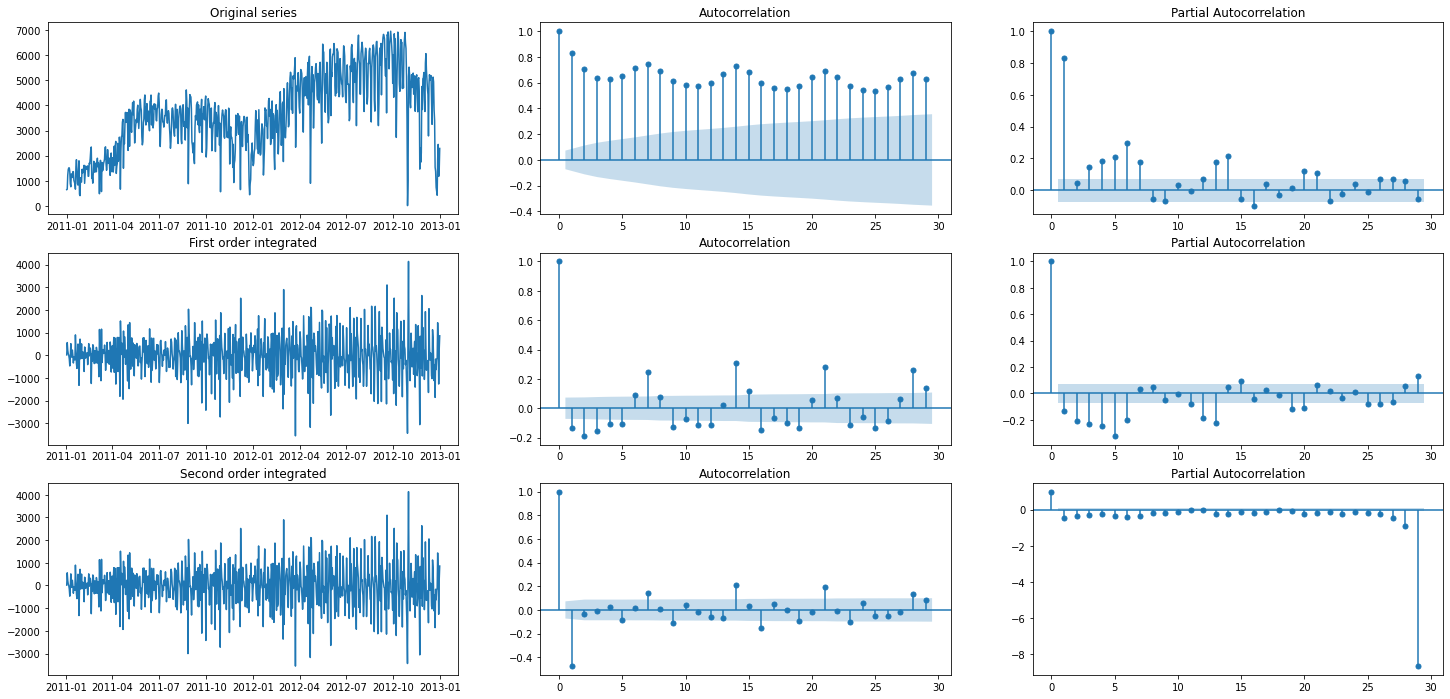

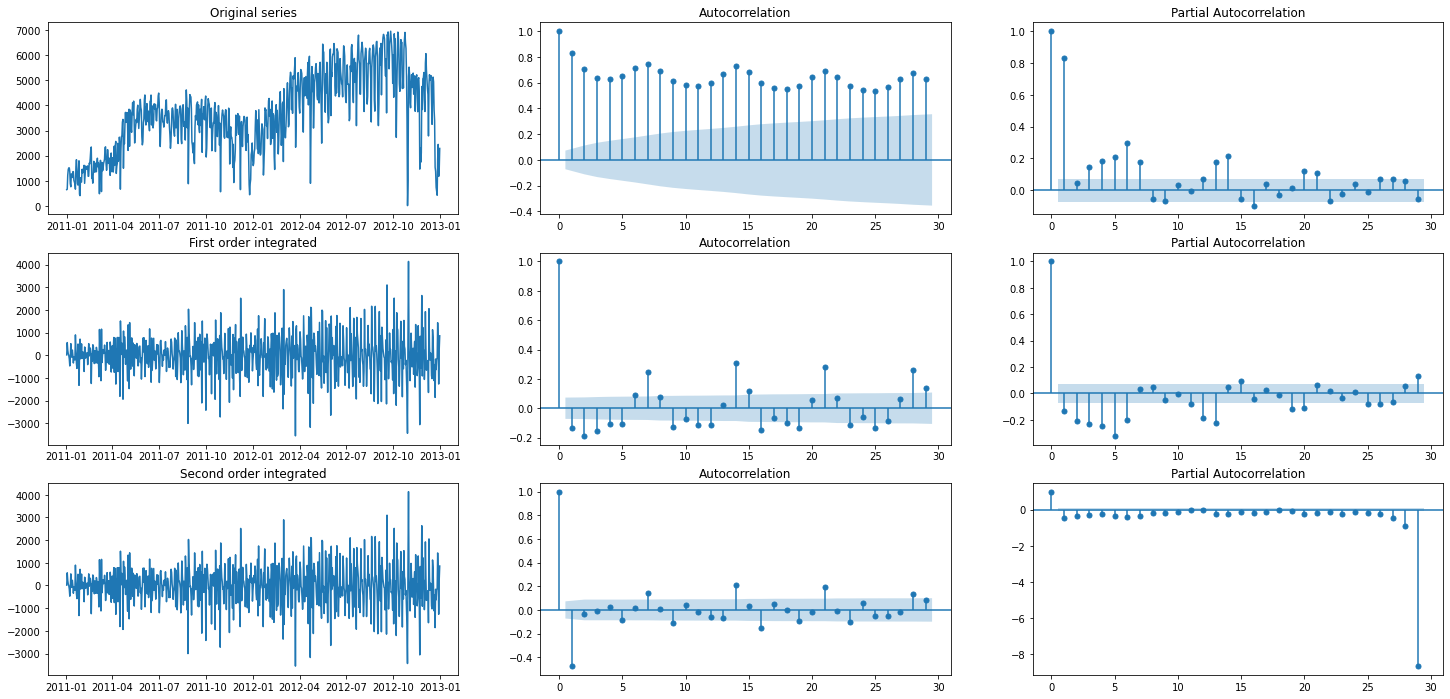

In [70]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(3, 3, figsize=(25, 12))
# plot original series
original = daily_rides["registered"]
axes[0,0].plot(original)
axes[0,0].set_title("Original series")
plot_acf(original, ax=axes[0,1])
plot_pacf(original, ax=axes[0,2])

# plot first order integrated series
first_order_int = original.diff().dropna()
axes[1,0].plot(first_order_int)
axes[1,0].set_title("First order integrated")
plot_acf(first_order_int, ax=axes[1,1])
plot_pacf(first_order_int, ax=axes[1,2])

# plot first order integrated series
second_order_int = first_order_int.diff().dropna()
axes[2,0].plot(first_order_int)
axes[2,0].set_title("Second order integrated")
plot_acf(second_order_int, ax=axes[2,1])
plot_pacf(second_order_int, ax=axes[2,2])

As you can see from the preceding figure, the original series exhibits several autocorrelation coefficients that are above the threshold. The first order integrated series has only a few, which makes it a good candidate for further modeling (hence, selecting an ARIMA(p,1,q) model). Finally, the second order integrated series present a large negative autocorrelation of lag 1, which, in general, is a sign of too large an order of integration.

Now focus on finding the model parameters and the coefficients for an ARIMA(p,d,q) model, based on the observed registered rides. The general approach is to try different combinations of parameters and chose the one that minimizes certain information criterion, for instance, the Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC):

In the following code snippet, fit an ARIMA(p,d,q) model to the registered column. Note that the pmdarima package is not a standard in Anaconda; therefore, in order to install it, you need to install it via the following:

# I need to change sci-kit learn version type before running this code.

In [78]:
# I need to roll back libraries in order to use auto_arima.
# from pmdarima import auto_arima
# model = auto_arima(registered, start_p=1, start_q=1, max_p=3, max_q=3, information_criterion="aic")
# print(model.summary())

ImportError: cannot import name 'delayed' from 'sklearn.utils.fixes' (C:\Users\crios\Anaconda3\lib\site-packages\sklearn\utils\fixes.py)

In [ ]:
# # plot original and predicted values

# plot_data = pd.DataFrame(registered)
# plot_data['predicted'] = model.predict_in_sample()
# plot_data.plot(figsize=(12, 8))
# plt.ylabel("number of registered rides")
# plt.title("Predicted vs actual number of rides")

### Investigating the Impact of Weather Conditions on Rides

In this activity, you will investigate the impact of weather conditions and their relationship with the other weather-related columns (temp, atemp, hum, and windspeed), as well as their impact on the number of registered and casual rides. The following steps will help you to perform the analysis:

# Summary

In this chapter, we studied a business problem related to bike sharing services. We started by presenting some of the main visual techniques in data analysis, such as bar plots, scatter plots, and time series visualizations. We also analyzed customer behaviors based on different time frames and weather conditions. We introduced the reader to hypothesis testing and some of its main applications. Finally, we presented the basics of time series analysis, and how to identify the best time series models when dealing with nonstationary time series.